### Question 1

In [4]:
#Inputting string from user 
inputted_string=raw_input()

Welcome to Natural Language Processing course. It has many Natural language processing techniques and also includes text mining . It will show various examples on text processing.


In [89]:
#Write a python function named “Tokenize” which returns the tokenized string
import nltk
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)

In [90]:
#Print tokens along with the frequency of each token using the above function
inputted_string_tokens=Tokenize(inputted_string).split(" ")
from collections import Counter
count_of_all_tokens=dict(Counter(inputted_string_tokens))
print count_of_all_tokens

{'and': 1, 'mining': 1, 'Welcome': 1, 'Natural': 2, 'Language': 1, 'show': 1, 'text': 2, 'processing': 2, 'includes': 1, 'course': 1, 'examples': 1, 'techniques': 1, 'on': 1, 'language': 1, 'also': 1, 'many': 1, 'Processing': 1, 'It': 2, '.': 3, 'will': 1, 'to': 1, 'various': 1, 'has': 1}


In [91]:
#Print the 5 least occurring tokens 
for key, value in sorted(count_of_all_tokens.iteritems(), key=lambda (k,v): (v,k),reverse=True)[:5]:
    print "%s: %s" % (key, value)

.: 3
text: 2
processing: 2
Natural: 2
It: 2


### Question 2

In [94]:
#Inputting string from user 
inputted_string=raw_input()

Welcome to Natural Language Processing course. It has many Natural language processing techniques and also includes text mining . It will show various examples on text processing.


In [95]:
#Write a python function named “RemoveStopWords” which returns the string after removing stop words
from nltk.corpus import stopwords
from string import punctuation

def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens)   
   

In [96]:
#Count frequency of each stop word present in a string using the above function
english_stopwords=stopwords.words('english')
stopwords_in_string=[]
tokens=nltk.tokenize.word_tokenize(inputted_string) 
for each in tokens:
    if each.lower() in english_stopwords:
        stopwords_in_string.append(each)
stopwords_in_string=list(set(stopwords_in_string))

count_of_stopwords=map(lambda x:inputted_string.count(x),stopwords_in_string)
print zip(stopwords_in_string,count_of_stopwords)

[('and', 1), ('on', 1), ('It', 2), ('will', 1), ('to', 1), ('has', 1)]


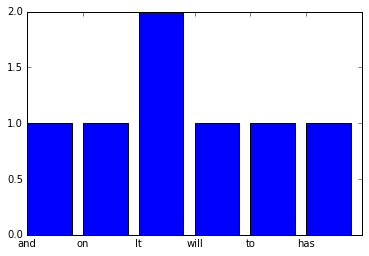

In [97]:
#Plot a bar graph depicting stop words and their frequencies
import matplotlib.pyplot as plt
plt.bar(range(len(stopwords_in_string)),count_of_stopwords)
plt.xticks(range(len(stopwords_in_string)),stopwords_in_string)
plt.show()

### Question 3

In [ ]:
#Inputting string from user 
inputted_string=raw_input()

In [98]:
#Write a python function named “Lemmatize” which returns a string after lemmatizing the string.
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        lemmatizeWords.append(word_lem.lemmatize(each))
    return " ".join(lemmatizeWords)


In [99]:
#Write a python function named “Stemmed” which returns a string after stemming the string.
from nltk.stem import PorterStemmer
def Stemmed(string):
    pst=PorterStemmer()
    words=string.split() 
    stemmedWords=[]
    for each in words:
        stemmedWords.append(pst.stem(each))
    return " ".join(stemmedWords)

In [100]:
#Print all the words along with their lemmatized and stemmed form using the above functions

#Lemmatization Results
print ("Lemmatized Form:")
print Lemmatize(inputted_string)

print 
#Stemming Results

print ("Stemmed Form:")
print Stemmed(inputted_string)

Lemmatized Form:
Welcome to Natural Language Processing course. It ha many Natural language processing technique and also includes text mining . It will show various example on text processing.

Stemmed Form:
welcom to natur languag process course. It ha mani natur languag process techniqu and also includ text mine . It will show variou exampl on text processing.


In [101]:
#Save these results in a csv file having 3 columns:
lemmatize_words=Lemmatize(inputted_string).split(" ")
stem_words=Stemmed(inputted_string).split(" ")
original_words=inputted_string.split(" ")
result=[]
for each in zip(original_words,lemmatize_words,stem_words):
    result.append(each)
    
import pandas as pd
df=pd.DataFrame(result,columns=['Original Form','Lemmatized Form','Stemmed Form'])

In [102]:
df.to_csv('WordsWithLemmatizedAndStemmedForm.csv',index=False)

### Question 4

In [103]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer

#Tokenize Function
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)

#RemoveStopWordsFunction
def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens) 


#LemmatizeFunction
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        lemmatizeWords.append(word_lem.lemmatize(each))
    return " ".join(lemmatizeWords)

def Refine(string):
    return Lemmatize(RemoveStopWords(Tokenize(string)))

#Save the above functions in a file called PreProcess.py 